In [1]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

# Carga de datos 

In [9]:
df = pd.read_csv("data/df_final.csv")
df.head()

Customer ID  Gender  Age Married  Number of Dependents         City  \
0  8779-QRDMV    Male   78      No                     0  Los Angeles   
1  7495-OOKFY  Female   74     Yes                     1  Los Angeles   
2  1658-BYGOY    Male   71      No                     3  Los Angeles   
3  4598-XLKNJ  Female   78     Yes                     1    Inglewood   
4  4846-WHAFZ  Female   80     Yes                     1     Whittier   

   Population  Number of Referrals  Tenure in Months    Offer  ...  \
0       68701                    0                 1     None  ...   
1       55668                    1                 8  Offer E  ...   
2       47534                    0                18  Offer D  ...   
3       27778                    1                25  Offer C  ...   
4       26265                    1                37  Offer C  ...   

  Total Extra Data Charges  Total Long Distance Charges Total Revenue  \
0                       20                         0.00         59.65   
1                        0                       390.80       1024.10   
2                        0                       203.94       1910.88   
3                        0                       494.00       2995.07   
4                        0                       234.21       3102.36   

  Satisfaction Score Customer Status  Churn Value Churn Score  CLTV  \
0                  3         Churned            1          91  5433   
1                  3         Churned            1          69  5302   
2                  2         Churned            1          81  3179   
3                  2         Churned            1          88  5337   
4                  2         Churned            1          67  2793   

    Churn Category                  Churn Reason  
0       Competitor  Competitor offered more data  
1       Competitor  Competitor made better offer  
2       Competitor  Competitor made better offer  
3  Dissatisfaction     Limited range of services  
4            Price            Extra data charges  

[5 rows x 40 columns]

# EDA

In [7]:
# Cuantas filas y columnas tenemos
df.shape

(6991, 30)

In [4]:
# Cuántos valores nulos tenemos en el dataset
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Population                              0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                    

In [5]:
df["Churn Category"].unique()

array(['Competitor', 'Dissatisfaction', 'Price', 'Other', 'Attitude', nan],
      dtype=object)

In [6]:
df["Churn Reason"].unique()

array(['Competitor offered more data', 'Competitor made better offer',
       'Limited range of services', 'Extra data charges',
       'Competitor had better devices', "Don't know",
       'Service dissatisfaction',
       'Lack of affordable download/upload speed',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support', 'Attitude of support person',
       'Network reliability', 'Competitor offered higher download speeds',
       'Moved', 'Price too high', 'Attitude of service provider',
       'Poor expertise of phone support', 'Deceased', nan,
       'Lack of self-service on Website'], dtype=object)

- Quitaremos de nuestro dataset los clientes que han fallecido y los que se han mudado ya que no aporta información relevante ya que su estancia en la empresa no depende de o que le ofrezacamos sino a situaciones personales externas

In [7]:
len(df.loc[(df['Churn Reason']=="Moved") | (df['Churn Reason']=="Deceased") ]
)

52

In [5]:
df= df.loc[(df['Churn Reason']!="Moved")  & (df['Churn Reason']!="Deceased") ]

In [9]:
df.shape

(6991, 40)

In [6]:
df.drop(columns=["Customer ID","Churn Category","Churn Reason","Population","City"], axis=1, inplace=True)

In [7]:
# Exploramos los tipos de los datos que tenemos
df.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

# Variable respuesta

- 1 (Si): el cliente se quedó en la empresa
- 0 (No) : el cliente se marchó de la empresa

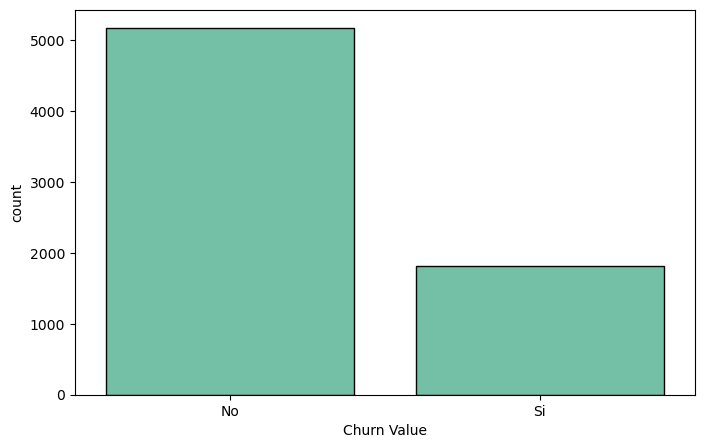

In [8]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "Churn Value",  color = "mediumaquamarine",  edgecolor='black'); 
fig1.set(xticklabels=["No", "Si"]) 
plt.show();

In [13]:
df["Churn Value"].value_counts() / df.shape[0]


0    0.740094
1    0.259906
Name: Churn Value, dtype: float64

# Variables predictoras

## Variables catégoricas


In [14]:
df_categoricas=df.select_dtypes(include = "object")

In [15]:
df_categoricas.head(2)

Gender Married    Offer Phone Service Multiple Lines Internet Service  \
0    Male      No     None            No             No              Yes   
1  Female     Yes  Offer E           Yes            Yes              Yes   

  Internet Type Online Security Online Backup Device Protection Plan  \
0           DSL              No            No                    Yes   
1   Fiber Optic              No           Yes                     No   

  Premium Tech Support Streaming TV Streaming Movies Streaming Music  \
0                   No           No              Yes              No   
1                   No           No               No              No   

  Unlimited Data        Contract Paperless Billing   Payment Method  \
0             No  Month-to-Month               Yes  Bank Withdrawal   
1            Yes  Month-to-Month               Yes      Credit Card   

  Customer Status  
0         Churned  
1         Churned

- "Churned" significa que el cliente ha abandonado el servicio.
- "Stayed" significa que el cliente ha permanecido en el servicio.
- "Joined" significa que el cliente ha adquirido el servicio recientemente.

In [16]:
df_categoricas.columns

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status'],
      dtype='object')

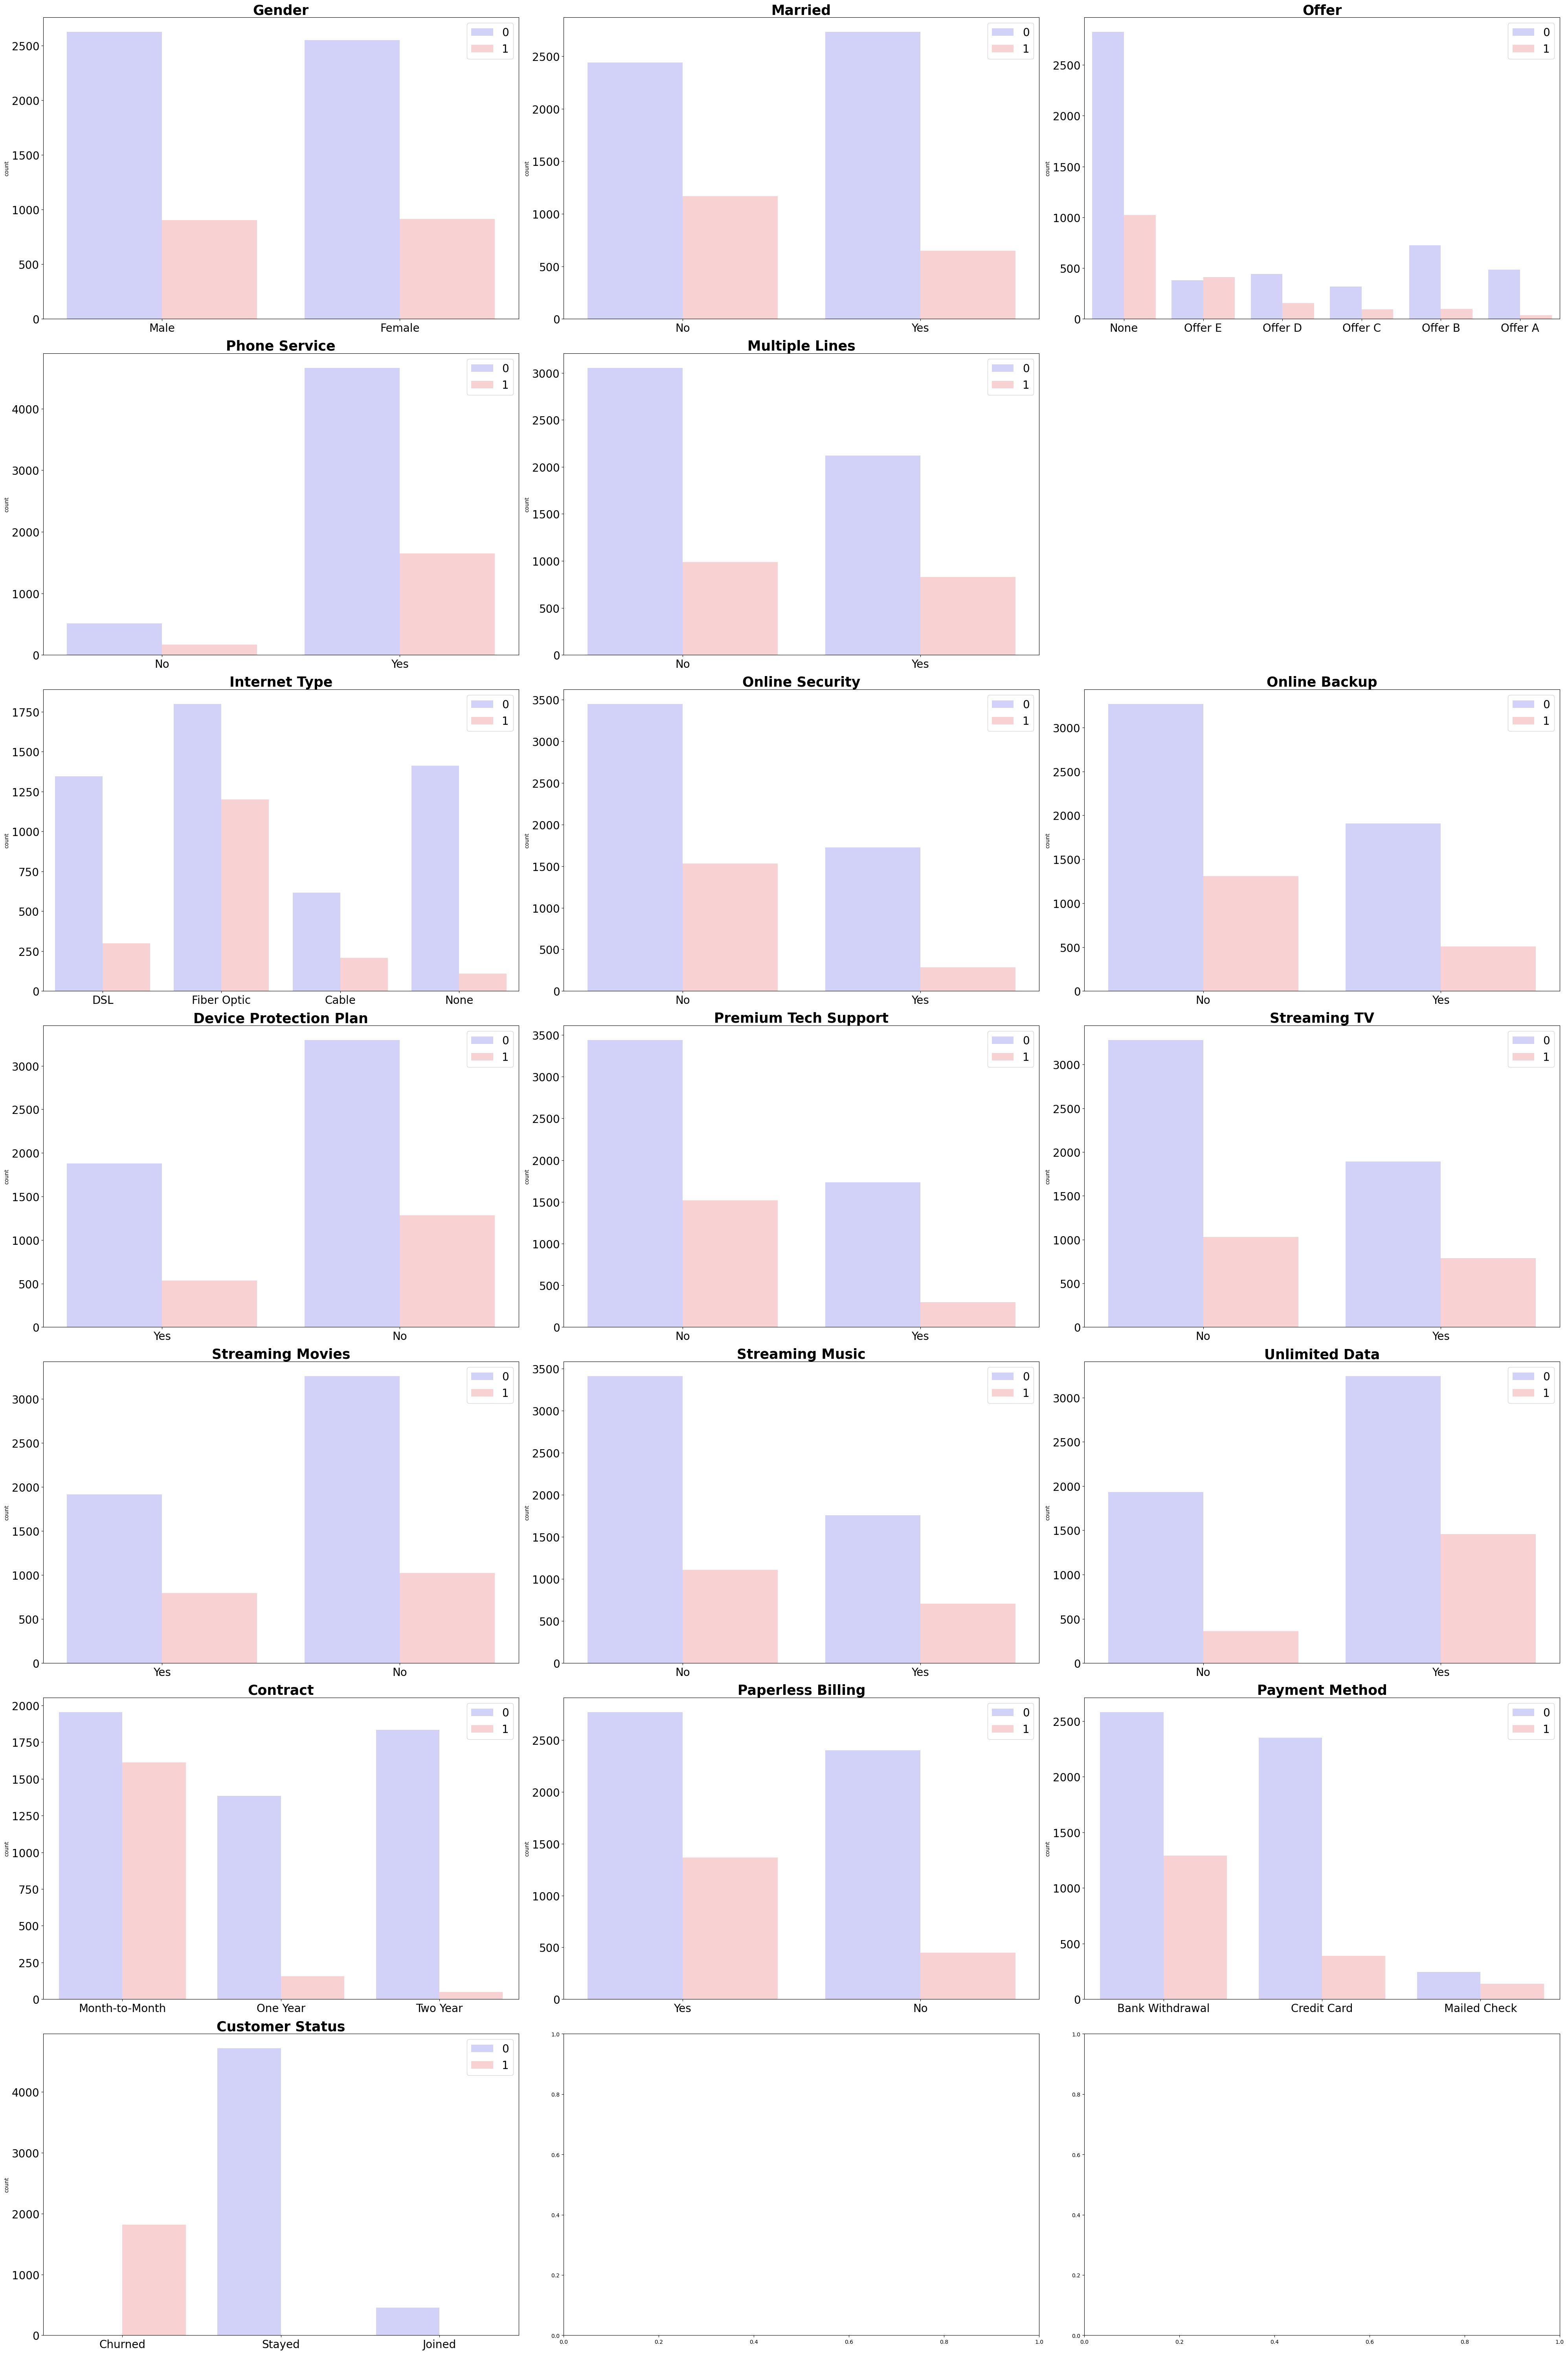

In [17]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 7, ncols = 3, figsize = (40, 60))

axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Churn Value",
        alpha = 0.2,
        palette = ["blue", "red"], # cambia los colores a azul y negro
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(fontsize=20) # aumenta el tamaño de la leyenda

fig.delaxes(axes[5])
fig.tight_layout()


In [18]:
df_categoricas["Customer Status"].unique()

array(['Churned', 'Stayed', 'Joined'], dtype=object)

- "Churned" significa que el cliente ha abandonado el servicio.
- "Stayed" significa que el cliente ha permanecido en el servicio.
- "Joined" significa que el cliente ha adquirido el servicio recientemente.

In [9]:
#eliminamos la columna Customer Status pues no nos da ninguna información relevante comparandolo con la variable repsuesta
df.drop(columns=["Customer Status"], axis=1, inplace=True)

In [10]:
df.head(1)

Gender  Age Married  Number of Dependents  Number of Referrals  \
0   Male   78      No                     0                    0   

   Tenure in Months Offer Phone Service  Avg Monthly Long Distance Charges  \
0                 1  None            No                                0.0   

  Multiple Lines  ... Monthly Charge Total Charges  Total Refunds  \
0             No  ...          39.65         39.65            0.0   

  Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                       20                         0.0         59.65   

  Satisfaction Score Churn Value Churn Score  CLTV  
0                  3           1          91  5433  

[1 rows x 34 columns]

## Variables numéricas

In [21]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (100, 70))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Churn Value")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        color = "blue",
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 35, fontweight = "bold")
    axes[i].tick_params(labelsize = 50)
    axes[i].set_xlabel("")
    


fig.delaxes(axes[5])

fig.tight_layout();


In [22]:
df_numericas = df.select_dtypes(include = np.number).drop("Churn Value", axis = 1)
correlation = df_numericas.corr()

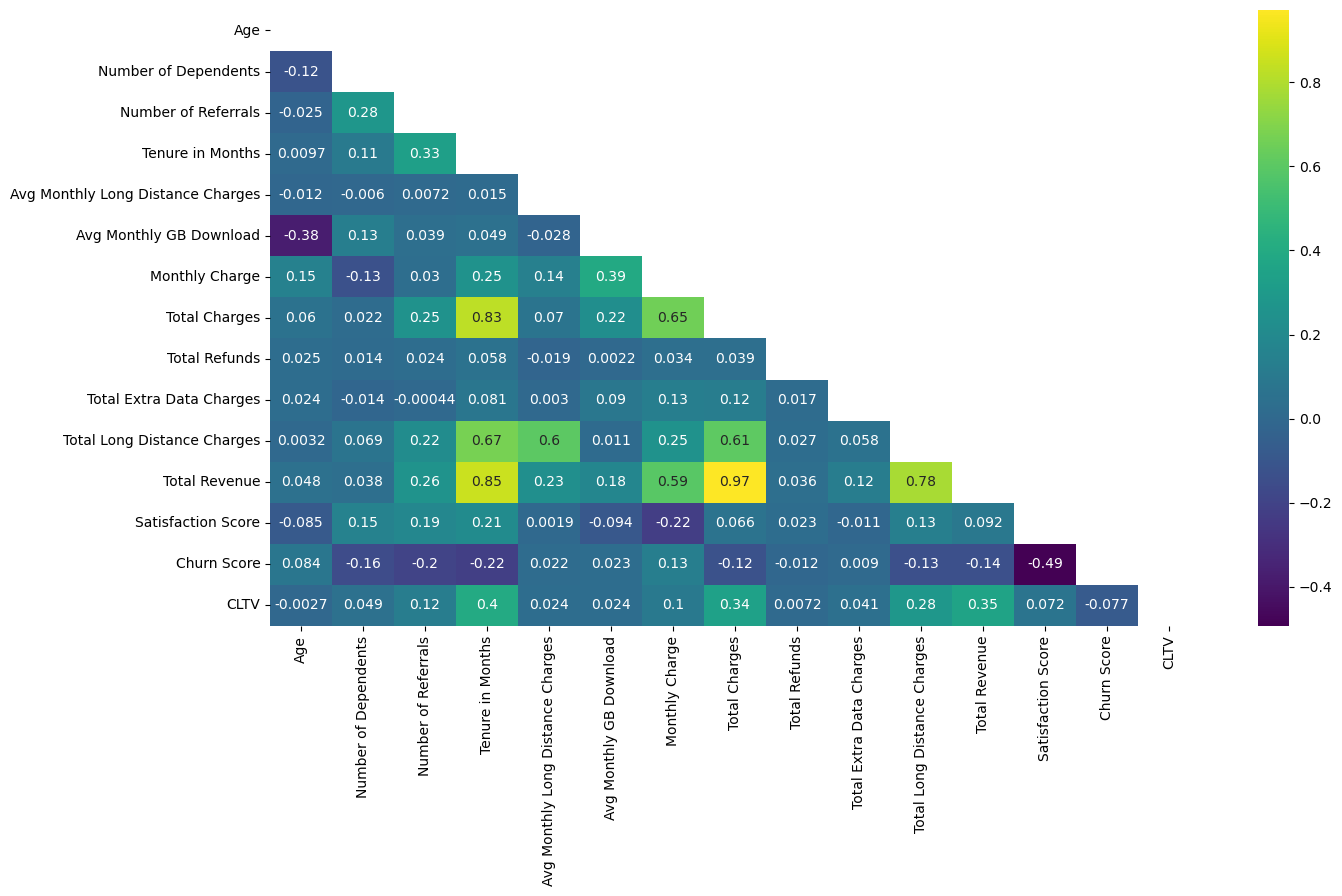

In [23]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); #barra lateral

- Total Revenue es el conjunto de todas estas columnas: 
    - Avg Monthly Long Distance Charges
    - Monthly Charge
    - Total Charges
    - Total Refunds
    - Total Extra Data Charges
    - Total Long Distance Charges

In [11]:
df.drop(columns=["Avg Monthly Long Distance Charges","Monthly Charge","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges"], axis=1, inplace=True)

In [25]:
df_numericas2 = df.select_dtypes(include = np.number)
correlation2 = df_numericas2.corr()

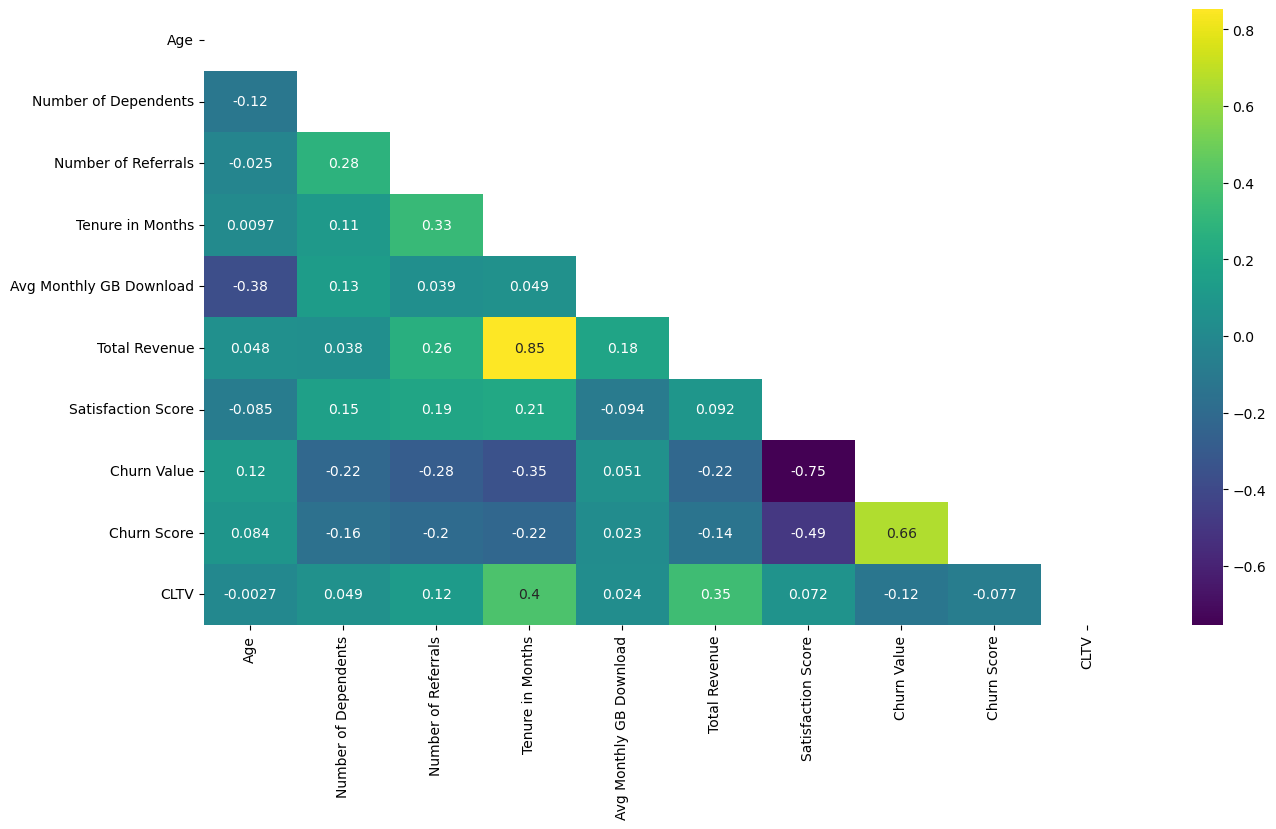

In [26]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation2, dtype=bool))
sns.heatmap(correlation2, cmap="viridis", annot = True, mask = mask); #barra lateral

 - "Churn Score" está directamente relaionado con la variable respuesta 
 - "Ternure in months" está directamente relacionado con "Ternure Revenue" ya que entre más tiempo haya estado el cliente en la empresa más dinero en ganancias da a la empresa , puest que tienen más servicios contratados 

In [12]:
df.drop(columns=["Churn Score","Tenure in Months"], axis=1, inplace=True)

In [13]:
df_numericas3 = df.select_dtypes(include = np.number)
correlation3 = df_numericas3.corr()

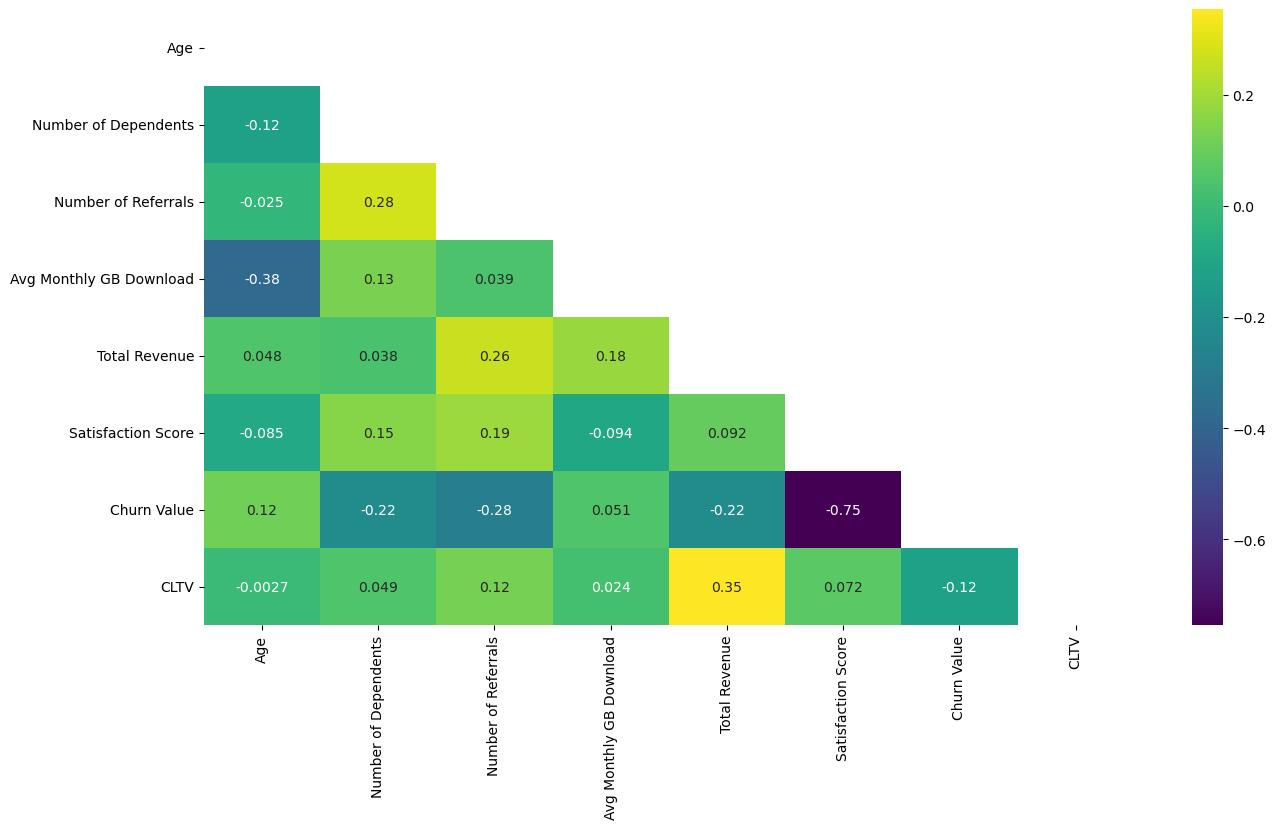

In [14]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation3, dtype=bool))
sns.heatmap(correlation3, cmap="viridis", annot = True, mask = mask); #barra lateral

# Preprocesamiento


## Outliers


In [30]:
df_numericas3.head(1)

Age  Number of Dependents  Number of Referrals  Avg Monthly GB Download  \
0   78                     0                    0                        8   

   Total Revenue  Satisfaction Score  Churn Value  CLTV  
0          59.65                   3            1  5433

In [15]:
df_numericas_1= df_numericas3.copy()

In [32]:
df_numericas_1.drop(columns=["Churn Value","Number of Dependents","Number of Referrals"], axis=1, inplace=True)

In [16]:
df_numericas_1.head(1)

Age  Number of Dependents  Number of Referrals  Avg Monthly GB Download  \
0   78                     0                    0                        8   

   Total Revenue  Satisfaction Score  Churn Value  CLTV  
0          59.65                   3            1  5433

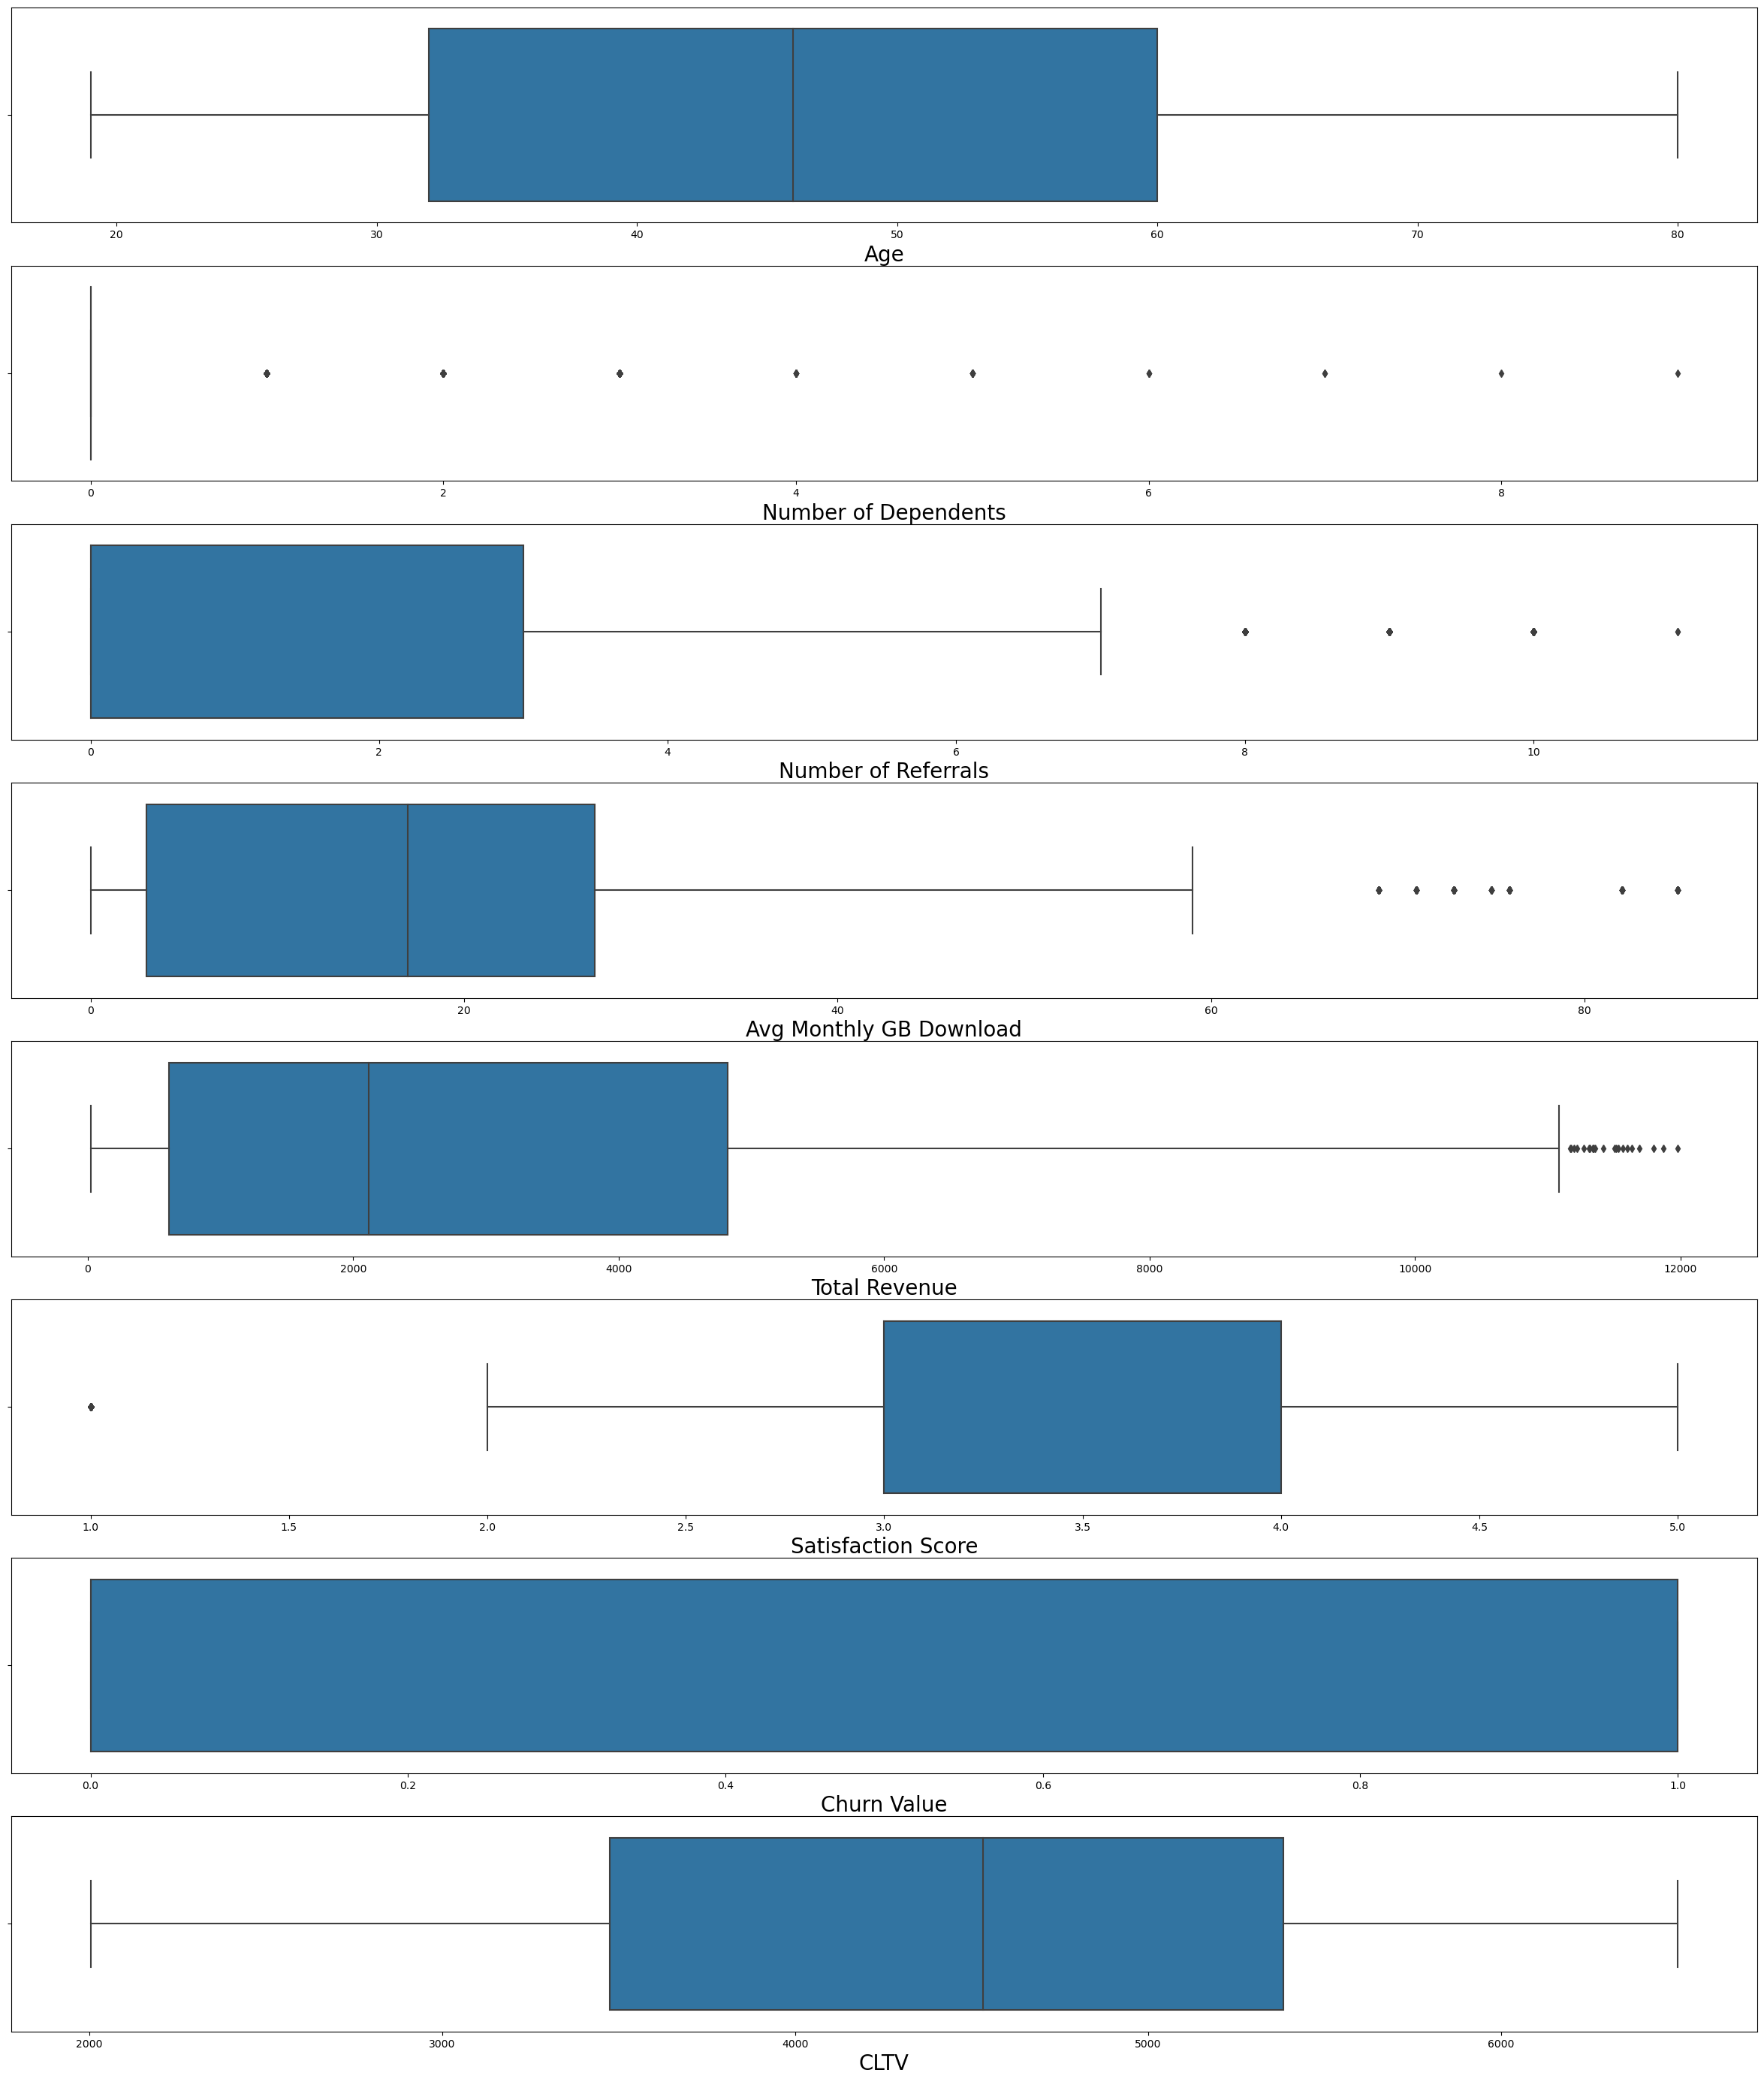

In [18]:
fig, ax = plt.subplots(8, 1, figsize=(30,35))

for i in range(len(df_numericas_1.columns)):
    sns.boxplot(x=df_numericas_1.columns[i], data=df_numericas_1, ax=ax[i])
    ax[i].set_xlabel(df_numericas_1.columns[i], fontsize=20)
    
plt.show()


In [26]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [19]:
df_numericas_1.describe().T

count         mean          std      min      25%  \
Age                      6991.0    46.488771    16.751029    19.00    32.00   
Number of Dependents     6991.0     0.470748     0.964593     0.00     0.00   
Number of Referrals      6991.0     1.961522     3.008016     0.00     0.00   
Avg Monthly GB Download  6991.0    20.532542    20.435951     0.00     3.00   
Total Revenue            6991.0  3042.933186  2868.153716    21.36   609.81   
Satisfaction Score       6991.0     3.253040     1.200463     1.00     3.00   
Churn Value              6991.0     0.259906     0.438614     0.00     0.00   
CLTV                     6991.0  4404.359176  1181.924892  2003.00  3475.00   

                             50%      75%       max  
Age                        46.00    60.00     80.00  
Number of Dependents        0.00     0.00      9.00  
Number of Referrals         0.00     3.00     11.00  
Avg Monthly GB Download    17.00    27.00     85.00  
Total Revenue            2114.55  4821.09  11979.34  
Satisfaction Score          3.00     4.00      5.00  
Churn Value                 0.00     1.00      1.00  
CLTV                     4531.00  5383.00   6500.00

In [23]:
lista_columnas = df_numericas_1.columns
lista_columnas

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
       'Churn Value', 'CLTV'],
      dtype='object')

In [27]:
ind=detectar_outliers(lista_columnas, df)


In [31]:
ind.keys()

dict_keys(['Number of Dependents', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score'])

In [36]:
len(ind["Total Revenue"])

21

In [44]:
Q1 = np.nanpercentile(df['Number of Referrals'], 25)
Q3 = np.nanpercentile(df["Number of Referrals"], 75)
IQR = Q3 - Q1


0.0

In [47]:
outlier_step = 1.5 * IQR
outlier_step

4.5

In [48]:
outliers_data = df[(df["Number of Referrals"] < Q1 - outlier_step) | (df["Number of Referrals"] > Q3 + outlier_step)]


In [51]:
outliers_data["Churn Value"].value_counts()

0    670
1      6
Name: Churn Value, dtype: int64

In [52]:
Q1 = np.nanpercentile(df['Number of Dependents'], 25)
Q3 = np.nanpercentile(df["Number of Dependents"], 75)
IQR = Q3 - Q1


In [53]:
outlier_step = 1.5 * IQR
outliers_data = df[(df["Number of Referrals"] < Q1 - outlier_step) | (df["Number of Referrals"] > Q3 + outlier_step)]
outliers_data["Churn Value"].value_counts()

0    2598
1     606
Name: Churn Value, dtype: int64

In [54]:
outliers_data["Number of Dependents"].value_counts()

0    1949
1     423
2     413
3     398
4       8
5       7
6       3
7       1
8       1
9       1
Name: Number of Dependents, dtype: int64

In [59]:
Q1 = np.nanpercentile(df['Avg Monthly GB Download'], 25)
Q3 = np.nanpercentile(df["Avg Monthly GB Download"], 75)
IQR = Q3 - Q1


In [63]:
outlier_step = 1.5 * IQR
outliers_data = df[(df["Avg Monthly GB Download"] < Q1 - outlier_step) | (df["Avg Monthly GB Download"] > Q3 + outlier_step)]
outliers_data["Avg Monthly GB Download"].value_counts()

73    81
69    75
76    57
85    47
82    43
71    42
75    15
Name: Avg Monthly GB Download, dtype: int64

In [64]:
outliers_data["Churn Value"].value_counts()

0    278
1     82
Name: Churn Value, dtype: int64

In [76]:
Q1 = np.nanpercentile(df['Total Revenue'], 25)
Q3 = np.nanpercentile(df["Total Revenue"], 75)
IQR = Q3 - Q1


In [77]:
outlier_step = 1.5 * IQR
outliers_data = df[(df["Total Revenue"] < Q1 - outlier_step) | (df["Total Revenue"] > Q3 + outlier_step)]
outliers_data["Churn Value"].value_counts()

0    20
1     1
Name: Churn Value, dtype: int64

In [70]:
Q1 = np.nanpercentile(df['Satisfaction Score'], 25)
Q3 = np.nanpercentile(df["Satisfaction Score"], 75)
IQR = Q3 - Q1


In [75]:
outlier_step = 1.5 * IQR
outliers_data = df[(df["Satisfaction Score"] < Q1 - outlier_step) | (df["Satisfaction Score"] > Q3 + outlier_step)]

In [73]:
outliers_data["Satisfaction Score"].value_counts()

1    909
Name: Satisfaction Score, dtype: int64

In [72]:
outliers_data["Churn Value"].value_counts()

1    909
Name: Churn Value, dtype: int64

In [74]:
outliers_data

Gender  Age Married  Number of Dependents  Number of Referrals    Offer  \
5     Female   72      No                     1                    0  Offer C   
7       Male   66     Yes                     0                    6  Offer B   
10    Female   78      No                     1                    0  Offer D   
11      Male   65      No                     0                    0  Offer D   
14      Male   68      No                     0                    0  Offer D   
...      ...  ...     ...                   ...                  ...      ...   
2522    Male   52      No                     0                    0     None   
2528    Male   51      No                     0                    0     None   
2530  Female   28      No                     0                    0     None   
2531    Male   64     Yes                     2                    1     None   
2534  Female   28      No                     0                    0  Offer A   

     Phone Service Multiple Lines Internet Service Internet Type  ...  \
5              Yes            Yes              Yes   Fiber Optic  ...   
7               No             No              Yes           DSL  ...   
10             Yes             No              Yes   Fiber Optic  ...   
11             Yes             No              Yes   Fiber Optic  ...   
14             Yes            Yes              Yes         Cable  ...   
...            ...            ...              ...           ...  ...   
2522           Yes            Yes              Yes   Fiber Optic  ...   
2528           Yes            Yes              Yes   Fiber Optic  ...   
2530           Yes             No              Yes         Cable  ...   
2531           Yes             No              Yes   Fiber Optic  ...   
2534           Yes            Yes              Yes   Fiber Optic  ...   

      Streaming Movies Streaming Music Unlimited Data        Contract  \
5                   No              No             No  Month-to-Month   
7                  Yes              No            Yes  Month-to-Month   
10                 Yes              No             No  Month-to-Month   
11                  No              No            Yes  Month-to-Month   
14                 Yes              No             No  Month-to-Month   
...                ...             ...            ...             ...   
2522                No              No            Yes  Month-to-Month   
2528               Yes             Yes            Yes  Month-to-Month   
2530                No              No            Yes  Month-to-Month   
2531                No              No            Yes  Month-to-Month   
2534                No              No            Yes  Month-to-Month   

     Paperless Billing   Payment Method Total Revenue Satisfaction Score  \
5                  Yes  Bank Withdrawal       2235.41                  1   
7                  Yes  Bank Withdrawal       2610.25                  1   
10                 Yes  Bank Withdrawal       1367.79                  1   
11                 Yes  Bank Withdrawal       1510.95                  1   
14                 Yes  Bank Withdrawal       1799.14                  1   
...                ...              ...           ...                ...   
2522               Yes  Bank Withdrawal        456.63                  1   
2528               Yes      Credit Card       5544.45                  1   
2530               Yes      Credit Card        344.27                  1   
2531               Yes      Credit Card        108.33                  1   
2534               Yes      Credit Card       9398.75                  1   

     Churn Value  CLTV  
5              1  4638  
7              1  5444  
10             1  5980  
11             1  4616  
14             1  2494  
...          ...   ...  
2522           1  3622  
2528           1  2832  
2530           1  5730  
2531           1  3463  
2534           1  5620  

[909 rows x 26 columns]

# Estandarización 

In [20]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (100, 70))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Churn Value")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        color = "blue",
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 35, fontweight = "bold")
    axes[i].tick_params(labelsize = 50)
    axes[i].set_xlabel("")
    


fig.delaxes(axes[5])

fig.tight_layout();


In [83]:
df_estandar=df.copy()

In [85]:
df_estandar.select_dtypes(include=np.number).columns


Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
       'Churn Value', 'CLTV'],
      dtype='object')

In [86]:
scaler = StandardScaler()
scaler.fit(df_estandar[['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
       'Churn Value', 'CLTV']])
X_escaladas = scaler.transform(df_estandar[['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
       'Churn Value', 'CLTV']])
df_estandar[['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
       'Churn Value', 'CLTV']] = X_escaladas
df_estandar.head()

Gender       Age Married  Number of Dependents  Number of Referrals  \
0    Male  1.881286      No             -0.488063            -0.652145   
1  Female  1.642478     Yes              0.548718            -0.319676   
2    Male  1.463372      No              2.622281            -0.652145   
3  Female  1.881286     Yes              0.548718            -0.319676   
4  Female  2.000691     Yes              0.548718            -0.319676   

     Offer Phone Service Multiple Lines Internet Service Internet Type  ...  \
0     None            No             No              Yes           DSL  ...   
1  Offer E           Yes            Yes              Yes   Fiber Optic  ...   
2  Offer D           Yes            Yes              Yes   Fiber Optic  ...   
3  Offer C           Yes             No              Yes   Fiber Optic  ...   
4  Offer C           Yes            Yes              Yes   Fiber Optic  ...   

   Streaming Movies Streaming Music Unlimited Data        Contract  \
0               Yes              No             No  Month-to-Month   
1                No              No            Yes  Month-to-Month   
2               Yes             Yes            Yes  Month-to-Month   
3               Yes              No            Yes  Month-to-Month   
4                No              No            Yes  Month-to-Month   

  Paperless Billing   Payment Method Total Revenue Satisfaction Score  \
0               Yes  Bank Withdrawal     -1.040215          -0.210800   
1               Yes      Credit Card     -0.703929          -0.210800   
2               Yes  Bank Withdrawal     -0.394726          -1.043871   
3               Yes  Bank Withdrawal     -0.016689          -1.043871   
4               Yes  Bank Withdrawal      0.020721          -1.043871   

  Churn Value      CLTV  
0    1.687469  0.870372  
1    1.687469  0.759528  
2    1.687469 -1.036823  
3    1.687469  0.789143  
4    1.687469 -1.363432  

[5 rows x 26 columns]

In [87]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (100, 70))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Churn Value")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        color = "blue",
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 35, fontweight = "bold")
    axes[i].tick_params(labelsize = 50)
    axes[i].set_xlabel("")
    


fig.delaxes(axes[5])

fig.tight_layout();


In [91]:
from sklearn.preprocessing import RobustScaler


In [106]:
df_robus=df.copy()

In [107]:
robust = RobustScaler()
robust.fit(df_estandar[['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
       'CLTV']])
X_escaladas = robust.transform(df_robus[['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
        'CLTV']])
df_robus[['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
        'CLTV']] = X_escaladas
df_robus.head()

Gender        Age Married  Number of Dependents  Number of Referrals  \
0    Male  46.677700      No              0.488063             0.653841   
1  Female  44.284867     Yes              1.488063             1.656441   
2    Male  42.490242      No              3.488063             0.653841   
3  Female  46.677700     Yes              1.488063             1.656441   
4  Female  47.874116     Yes              1.488063             1.656441   

     Offer Phone Service Multiple Lines Internet Service Internet Type  ...  \
0     None            No             No              Yes           DSL  ...   
1  Offer E           Yes            Yes              Yes   Fiber Optic  ...   
2  Offer D           Yes            Yes              Yes   Fiber Optic  ...   
3  Offer C           Yes             No              Yes   Fiber Optic  ...   
4  Offer C           Yes            Yes              Yes   Fiber Optic  ...   

   Streaming Movies Streaming Music Unlimited Data        Contract  \
0               Yes              No             No  Month-to-Month   
1                No              No            Yes  Month-to-Month   
2               Yes             Yes            Yes  Month-to-Month   
3               Yes              No            Yes  Month-to-Month   
4                No              No            Yes  Month-to-Month   

  Paperless Billing   Payment Method Total Revenue Satisfaction Score  \
0               Yes  Bank Withdrawal     40.843049           3.854172   
1               Yes      Credit Card    697.648820           3.854172   
2               Yes  Bank Withdrawal   1301.560086           2.653794   
3               Yes  Bank Withdrawal   2039.910699           2.653794   
4               Yes  Bank Withdrawal   2112.976893           2.653794   

  Churn Value         CLTV  
0           1  3365.205460  
1           1  3284.062332  
2           1  1969.048141  
3           1  3305.741794  
4           1  1729.954652  

[5 rows x 26 columns]

In [105]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (100, 70))

axes = axes.flat

columnas_numeric = df_robus.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Churn Value")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_robus,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        color = "blue",
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 35, fontweight = "bold")
    axes[i].tick_params(labelsize = 50)
    axes[i].set_xlabel("")
    


fig.delaxes(axes[5])

fig.tight_layout();

In [117]:
robust = RobustScaler()
robust.fit(df[['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
       'CLTV']])
X_escaladas = robust.transform(df[['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
        'CLTV']])
df[['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score',
        'CLTV']] = X_escaladas
df.head()

Gender       Age Married  Number of Dependents  Number of Referrals  \
0    Male  1.142857      No                   0.0             0.000000   
1  Female  1.000000     Yes                   1.0             0.333333   
2    Male  0.892857      No                   3.0             0.000000   
3  Female  1.142857     Yes                   1.0             0.333333   
4  Female  1.214286     Yes                   1.0             0.333333   

     Offer Phone Service Multiple Lines Internet Service Internet Type  ...  \
0     None            No             No              Yes           DSL  ...   
1  Offer E           Yes            Yes              Yes   Fiber Optic  ...   
2  Offer D           Yes            Yes              Yes   Fiber Optic  ...   
3  Offer C           Yes             No              Yes   Fiber Optic  ...   
4  Offer C           Yes            Yes              Yes   Fiber Optic  ...   

   Streaming Movies Streaming Music Unlimited Data        Contract  \
0               Yes              No             No  Month-to-Month   
1                No              No            Yes  Month-to-Month   
2               Yes             Yes            Yes  Month-to-Month   
3               Yes              No            Yes  Month-to-Month   
4                No              No            Yes  Month-to-Month   

  Paperless Billing   Payment Method Total Revenue Satisfaction Score  \
0               Yes  Bank Withdrawal     -0.487951                0.0   
1               Yes      Credit Card     -0.258936                0.0   
2               Yes  Bank Withdrawal     -0.048363               -1.0   
3               Yes  Bank Withdrawal      0.209086               -1.0   
4               Yes  Bank Withdrawal      0.234563               -1.0   

  Churn Value      CLTV  
0           1  0.472746  
1           1  0.404088  
2           1 -0.708595  
3           1  0.422432  
4           1 -0.910901  

[5 rows x 26 columns]

# Codificación

In [118]:
import pickle

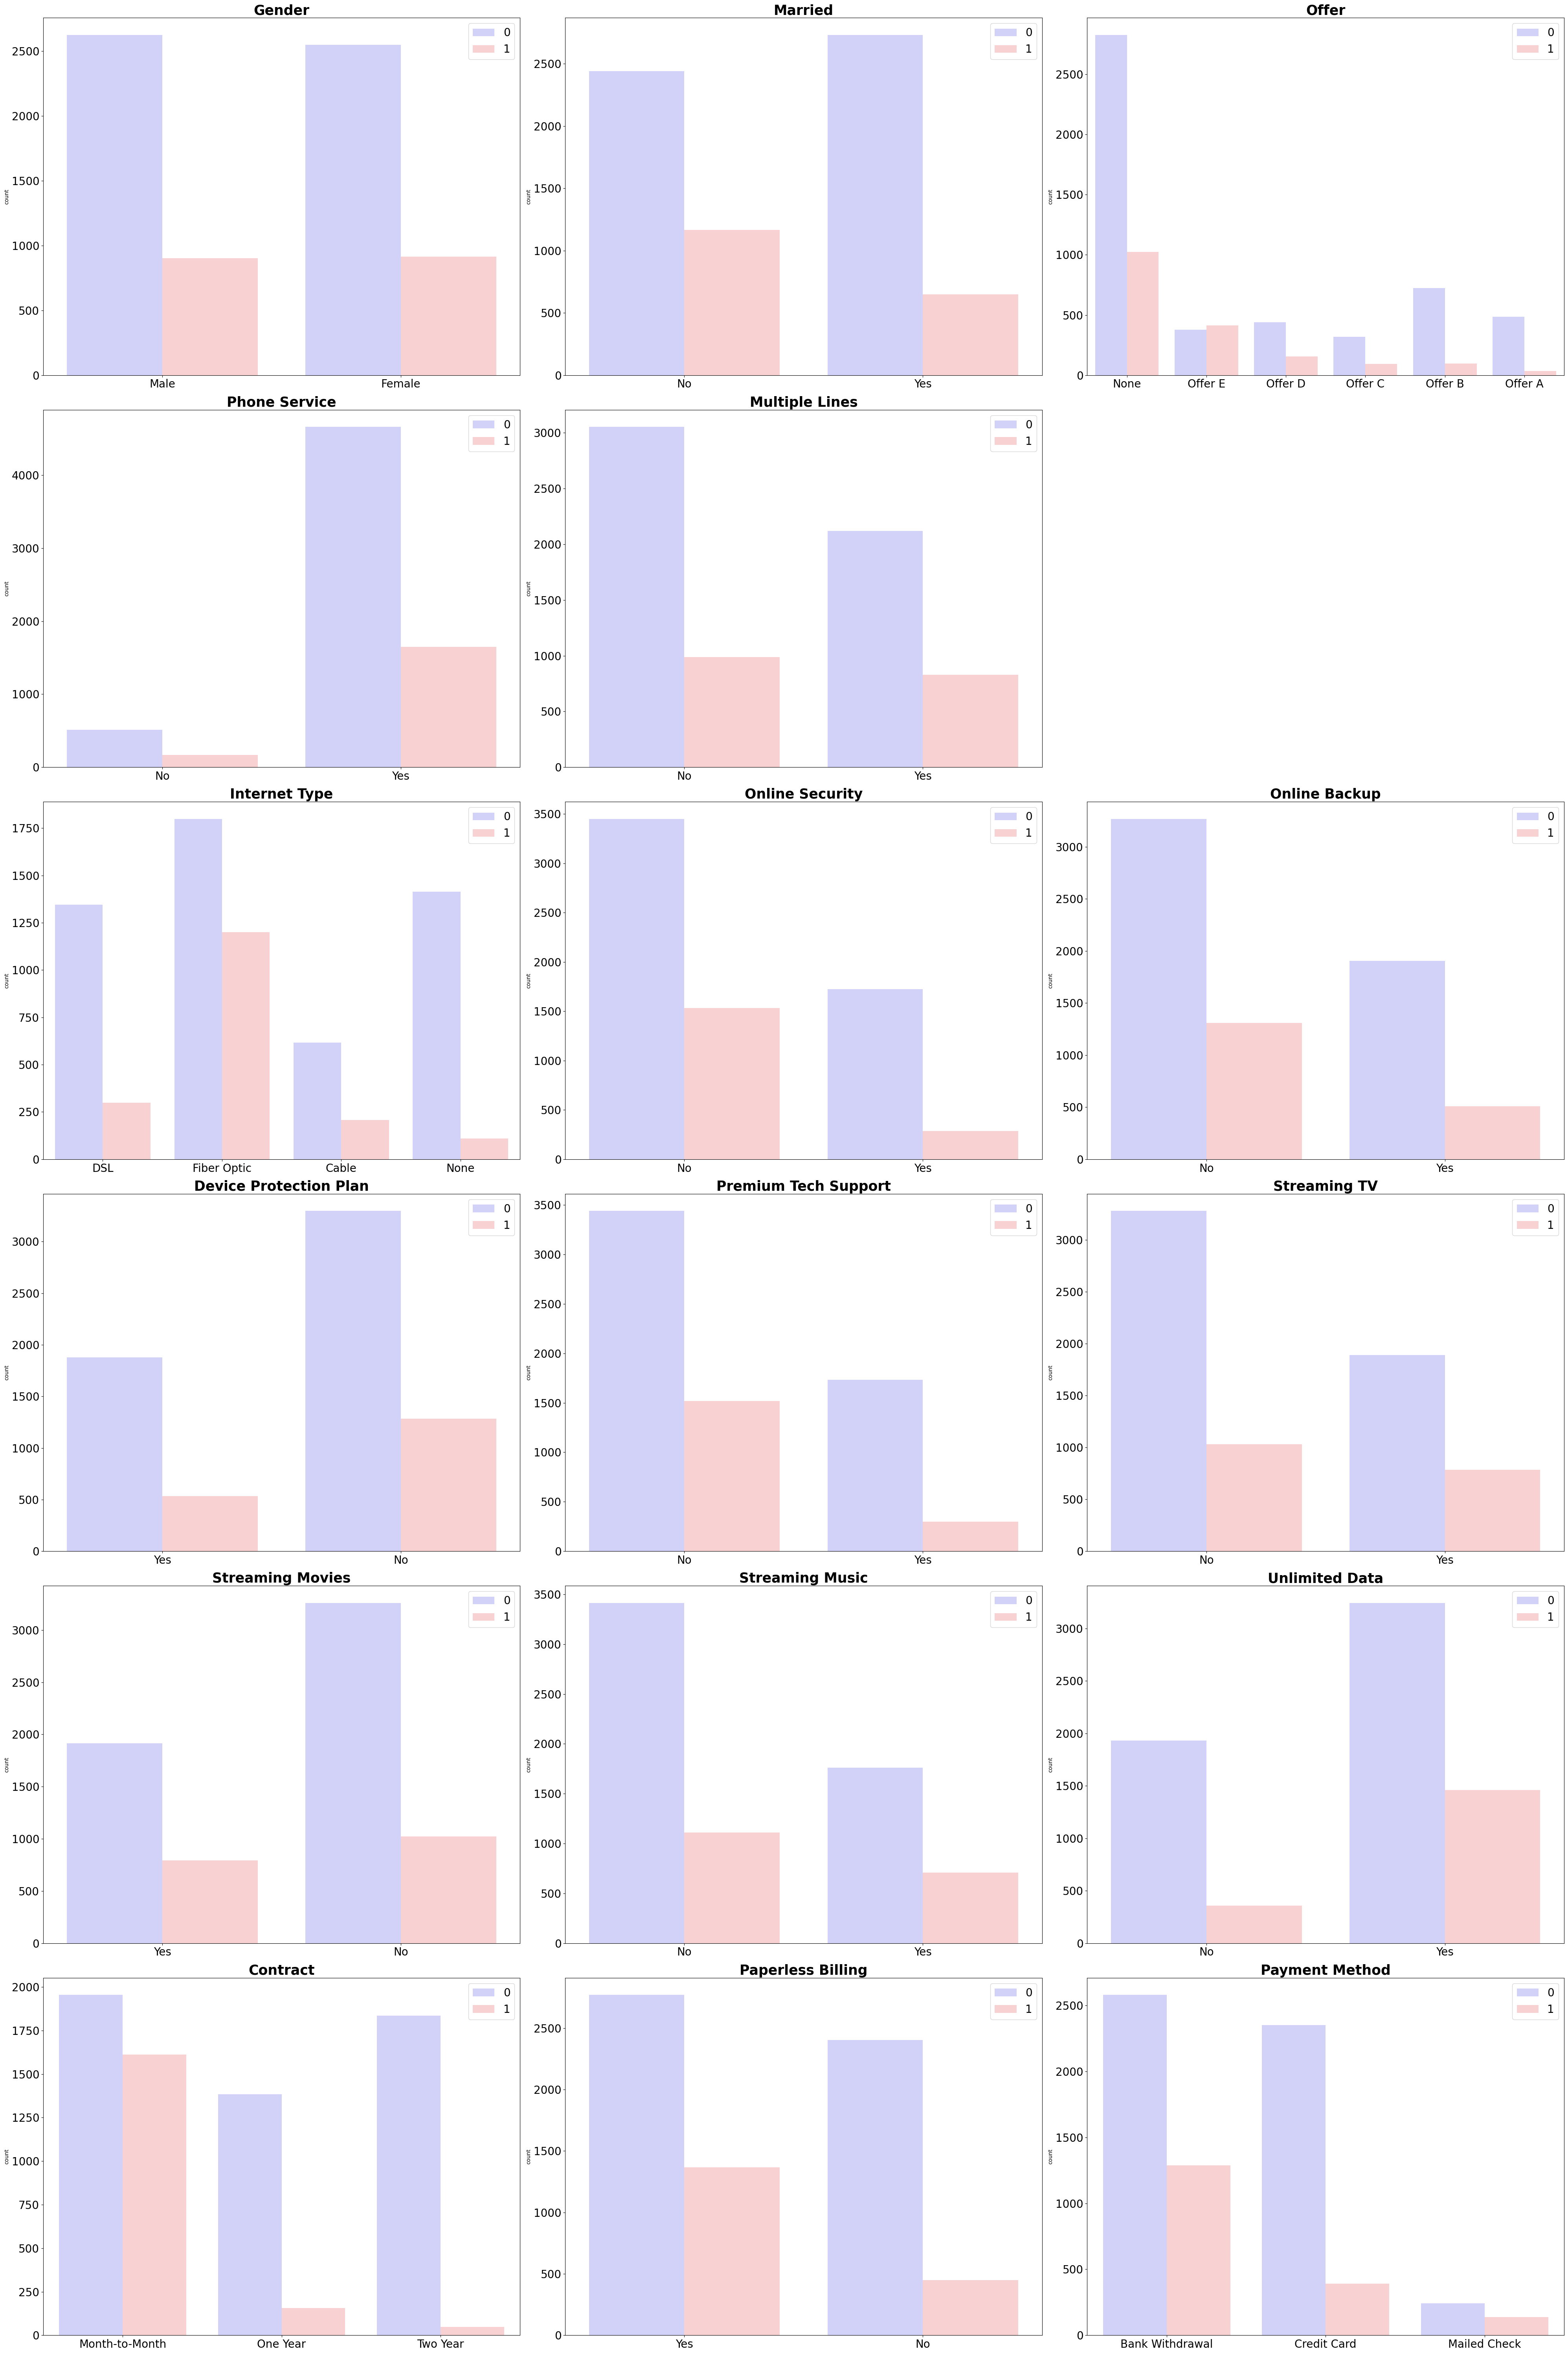

In [40]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (40, 60))

axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Churn Value",
        alpha = 0.2,
        palette = ["blue", "red"], # cambia los colores a azul y negro
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(fontsize=20) # aumenta el tamaño de la leyenda

fig.delaxes(axes[5])
fig.tight_layout()


## Variables sin orden

In [41]:
print(' Gender, tiene', df['Gender'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Multiple Lines has', df['Multiple Lines'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Streaming TV has', df['Streaming TV'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Streaming Music has', df['Streaming Music'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Streaming Movies has', df['Streaming Movies'].unique(), 'categorias')

 Gender, tiene ['Male' 'Female'] categorias
---------------------------------------------------------------------------
Multiple Lines has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Streaming TV has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Streaming Music has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Streaming Movies has ['Yes' 'No'] categorias


### one hot encoding : valores binarios 

In [112]:
import pickle

In [119]:
def one_hot_encoder(dff, columnas):
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    with open(f'../data/ML/pkl/encoding{columnas[0]}.pkl', 'wb') as s:
        pickle.dump(oh, s)
    
    return dff

In [120]:
# Restablecer el índice del DataFrame
df.reset_index(drop=True, inplace=True)

In [121]:
df.head(1)

Gender       Age Married  Number of Dependents  Number of Referrals Offer  \
0   Male  1.142857      No                   0.0                  0.0  None   

  Phone Service Multiple Lines Internet Service Internet Type  ...  \
0            No             No              Yes           DSL  ...   

   Streaming Movies Streaming Music Unlimited Data        Contract  \
0               Yes              No             No  Month-to-Month   

  Paperless Billing   Payment Method Total Revenue Satisfaction Score  \
0               Yes  Bank Withdrawal     -0.487951                0.0   

  Churn Value      CLTV  
0           1  0.472746  

[1 rows x 26 columns]

In [122]:
df= one_hot_encoder(df, ["Gender","Multiple Lines","Streaming TV","Streaming Music","Streaming Movies"])

In [46]:
df_robus.head(1)

Age Married  Number of Dependents  Number of Referrals Offer Phone Service  \
0   78      No                     0                    0  None            No   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes           DSL                        8              No   

   ... Gender_Female Gender_Male Multiple Lines_No Multiple Lines_Yes  \
0  ...             0           1                 1                  0   

  Streaming TV_No Streaming TV_Yes Streaming Music_No  Streaming Music_Yes  \
0               1                0                  1                    0   

   Streaming Movies_No  Streaming Movies_Yes  
0                    0                     1  

[1 rows x 31 columns]

## Variables con orden

In [47]:
# Chequeamos valores únicos

print(' Married, tiene', df['Married'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Offer has', df['Offer'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Phone Service has', df['Phone Service'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Internet Type has', df['Internet Type'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Online Security has', df['Online Security'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Online Backup has', df['Online Backup'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Device Protection Plan has', df['Device Protection Plan'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Premium Tech Support has', df['Premium Tech Support'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Unlimited Data has', df['Unlimited Data'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Contract has', df['Contract'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Paperless Billing', df['Paperless Billing'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Payment Method has', df['Payment Method'].unique(), 'categorias')

 Married, tiene ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Offer has ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A'] categorias
---------------------------------------------------------------------------
Phone Service has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Internet Type has ['DSL' 'Fiber Optic' 'Cable' 'None'] categorias
---------------------------------------------------------------------------
Online Security has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Online Backup has ['No' 'Yes'] categorias
---------------------------------------------------------------------------
Device Protection Plan has ['Yes' 'No'] categorias
---------------------------------------------------------------------------
Premium Tech Support has ['No' 'Yes'] categorias
------------------------------------------------------

### Ordinal encoding 

In [ ]:
# definimos el orden que tendra cada categoría 

In [123]:
orden_married=["Yes","No"]
orden_phone_service=["No","Yes"]
orden_internet_type=["None","Cable","DSL","Fiber Optic"]
orden_online_sec=["Yes","No"]
orden_online_backup=["Yes","No"]
orden_device_protection=["Yes","No"]
orden_prem_tech_supp=["Yes","No"]
orden_unlimited_data=["No","Yes"]
orden_paperless_b=["No","Yes"]
orden_payment_method=["Mailed Check","Credit Card","Bank Withdrawal"]

In [124]:
def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    
    with open(f'../data/ML/pkl/encoding{columna}.pkl', 'wb') as s:
        pickle.dump(ordinal, s)
    return df

In [125]:
df = ordinal_encoder(orden_married, df, "Married")
df = ordinal_encoder(orden_phone_service, df, "Phone Service")
df = ordinal_encoder(orden_internet_type, df, "Internet Type")
df = ordinal_encoder(orden_online_sec, df, "Online Security")
df = ordinal_encoder(orden_online_backup, df, "Online Backup")
df = ordinal_encoder(orden_device_protection, df, "Device Protection Plan")
df = ordinal_encoder(orden_prem_tech_supp, df, "Premium Tech Support")
df = ordinal_encoder(orden_unlimited_data, df, "Unlimited Data")
df = ordinal_encoder(orden_paperless_b, df, "Paperless Billing")
df = ordinal_encoder(orden_payment_method, df, "Payment Method")


In [126]:
df.head()

Age  Married  Number of Dependents  Number of Referrals    Offer  \
0  1.142857        1                   0.0             0.000000     None   
1  1.000000        0                   1.0             0.333333  Offer E   
2  0.892857        1                   3.0             0.000000  Offer D   
3  1.142857        0                   1.0             0.333333  Offer C   
4  1.214286        0                   1.0             0.333333  Offer C   

   Phone Service Internet Service  Internet Type  Avg Monthly GB Download  \
0              0              Yes              2                -0.375000   
1              1              Yes              3                 0.000000   
2              1              Yes              3                 1.458333   
3              1              Yes              3                -0.208333   
4              1              Yes              3                -0.125000   

   Online Security  ...  Gender_Female  Gender_Male  Multiple Lines_No  \
0                1  ...              0            1                  1   
1                1  ...              1            0                  0   
2                1  ...              0            1                  0   
3                1  ...              1            0                  1   
4                1  ...              1            0                  0   

   Multiple Lines_Yes Streaming TV_No  Streaming TV_Yes  Streaming Music_No  \
0                   0               1                 0                   1   
1                   1               1                 0                   1   
2                   1               0                 1                   0   
3                   0               0                 1                   1   
4                   1               1                 0                   1   

   Streaming Music_Yes  Streaming Movies_No  Streaming Movies_Yes  
0                    0                    0                     1  
1                    0                    1                     0  
2                    1                    0                     1  
3                    0                    0                     1  
4                    0                    1                     0  

[5 rows x 31 columns]

In [74]:
df["Internet Service"].unique()

array(['Yes', 'No'], dtype=object)

### Map

In [127]:

print(' Offer, tiene', df['Offer'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('Contract has', df['Contract'].unique(), 'categorias')
print("---------------------------------------------------------------------------")

 Offer, tiene ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A'] categorias
---------------------------------------------------------------------------
Contract has ['Month-to-Month' 'One Year' 'Two Year'] categorias
---------------------------------------------------------------------------


In [128]:
mapa_contract = {"Month-to-Month":  1, 
       "One Year": 0, "Two Year":0}

In [129]:
mapa_offer = {"Offer A":  0, "Offer B": 1,"Offer C":1,"Offer D":2,"Offer E":3, "None":4}

In [130]:
def ordinal_map(df, columna, orden_valores):
    ordinal_dict = {}
    
    for i, valor in enumerate(orden_valores):
        ordinal_dict[valor] = i
        
    nuevo_nombre = columna + "_mapeada"
    
    df[nuevo_nombre] = df[columna].map(ordinal_dict)
        
    return df

In [131]:
df = ordinal_map(df, "Contract",mapa_contract)
df = ordinal_map(df, "Offer",mapa_offer)


In [132]:
df.head()

Age  Married  Number of Dependents  Number of Referrals    Offer  \
0  1.142857        1                   0.0             0.000000     None   
1  1.000000        0                   1.0             0.333333  Offer E   
2  0.892857        1                   3.0             0.000000  Offer D   
3  1.142857        0                   1.0             0.333333  Offer C   
4  1.214286        0                   1.0             0.333333  Offer C   

   Phone Service Internet Service  Internet Type  Avg Monthly GB Download  \
0              0              Yes              2                -0.375000   
1              1              Yes              3                 0.000000   
2              1              Yes              3                 1.458333   
3              1              Yes              3                -0.208333   
4              1              Yes              3                -0.125000   

   Online Security  ...  Multiple Lines_No  Multiple Lines_Yes  \
0                1  ...                  1                   0   
1                1  ...                  0                   1   
2                1  ...                  0                   1   
3                1  ...                  1                   0   
4                1  ...                  0                   1   

   Streaming TV_No  Streaming TV_Yes Streaming Music_No  Streaming Music_Yes  \
0                1                 0                  1                    0   
1                1                 0                  1                    0   
2                0                 1                  0                    1   
3                0                 1                  1                    0   
4                1                 0                  1                    0   

   Streaming Movies_No  Streaming Movies_Yes  Contract_mapeada  Offer_mapeada  
0                    0                     1                 0              5  
1                    1                     0                 0              4  
2                    0                     1                 0              3  
3                    0                     1                 0              2  
4                    1                     0                 0              2  

[5 rows x 33 columns]

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      6991 non-null   float64
 1   Married                  6991 non-null   int64  
 2   Number of Dependents     6991 non-null   float64
 3   Number of Referrals      6991 non-null   float64
 4   Offer                    6991 non-null   object 
 5   Phone Service            6991 non-null   int64  
 6   Internet Service         6991 non-null   object 
 7   Internet Type            6991 non-null   int64  
 8   Avg Monthly GB Download  6991 non-null   float64
 9   Online Security          6991 non-null   int64  
 10  Online Backup            6991 non-null   int64  
 11  Device Protection Plan   6991 non-null   int64  
 12  Premium Tech Support     6991 non-null   int64  
 13  Unlimited Data           6991 non-null   int64  
 14  Contract                

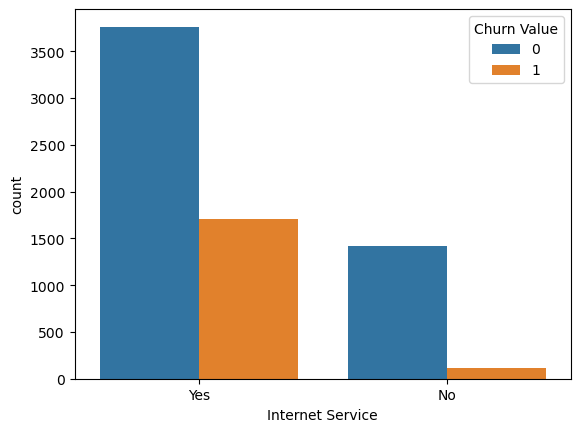

In [75]:
sns.countplot(x='Internet Service', hue='Churn Value', data=df)
plt.show()

In [ ]:
df["Internet Serivce"].value_counts

In [135]:
df_final= df.copy()

In [136]:
df_final.drop(columns=["Internet Service","Offer","Contract"], axis=1, inplace=True)

In [137]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      6991 non-null   float64
 1   Married                  6991 non-null   int64  
 2   Number of Dependents     6991 non-null   float64
 3   Number of Referrals      6991 non-null   float64
 4   Phone Service            6991 non-null   int64  
 5   Internet Type            6991 non-null   int64  
 6   Avg Monthly GB Download  6991 non-null   float64
 7   Online Security          6991 non-null   int64  
 8   Online Backup            6991 non-null   int64  
 9   Device Protection Plan   6991 non-null   int64  
 10  Premium Tech Support     6991 non-null   int64  
 11  Unlimited Data           6991 non-null   int64  
 12  Paperless Billing        6991 non-null   int64  
 13  Payment Method           6991 non-null   int64  
 14  Total Revenue           

In [139]:
df_final.to_csv('../data2/df_final1.csv', index=False)